# Hands-On-Session: Comparing subject vocabularies

### Importing relevant modules and prepared subject vocabularies

In [38]:
import csv
import json
import nltk
from tabulate import tabulate
from collections import Counter, defaultdict
import string
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re

#Import of ACDH-CH website (acdhch)
with open("acdhch_website.json", encoding = "utf-8") as datei:
    acdhch = json.load(datei)
#Import of ARCHE (all, hasAppliedMethod, hasCategory, hasSubject)
with open("arche.json", encoding = "utf-8") as datei:
    arche = json.load(datei)
with open("arche_hasAppliedMethod.json", encoding = "utf-8") as datei:
    arche_hasAppliedMethod = json.load(datei)
with open("arche_hasCategory.json", encoding = "utf-8") as datei:
    arche_hasCategory = json.load(datei)
with open("arche_hasSubject.json", encoding = "utf-8") as datei:
    arche_hasSubject = json.load(datei)
#Import of DARIAH-Campus (dc)
with open("dariah_campus.json", encoding = "utf-8") as datei:
    dc = json.load(datei)
#Import of dha taxonomy
with open("dha_taxonomy.json", encoding = "utf-8") as datei:
    dha_taxonomy = json.load(datei)
#Import of dha website
with open("dha_website.json", encoding = "utf-8") as datei:
    dha_website = json.load(datei)
#Import of GAMS
with open("gams.json", encoding = "utf-8") as datei:
    gams = json.load(datei)
#Import of ACDH-CH HowTo
with open("howto.json", encoding = "utf-8") as datei:
    ht = json.load(datei)
#Import of SSHOC
with open("SSHOC.json", encoding = "utf-8") as datei:
    sshoc = json.load(datei)
#Import of TaDiRAH Products
with open("tadirah_products.json", encoding = "utf-8") as datei:
    tadirah_prod = json.load(datei)
#Import of TaDiRAH Processes
with open("tadirah_processes.json", encoding = "utf-8") as datei:
    tadirah_proc = json.load(datei)
#Import of Zotero (KONDE)
with open("zotero_konde.json", encoding = "utf-8") as datei:
    zotero_konde = json.load(datei)
#Import of ÖFOS
with open("öfos.json", encoding = "utf-8") as datei:
    öfos = json.load(datei)
#Import of GoTriple Ontology
with open("gt.json", encoding = "utf-8") as datei:
    gto = json.load(datei)

In [64]:
import vc
#import vc_fuzzy3

### Preprocessing of subject vocabularies

[description of steps of preprocessing:
- lowercase
- deletion of duplicates]

### Choosing a set of subject vocabularies for comparison

By using the keywords below, you can choose the vocabularies you would like to compare with each other - the following vocabularies can currently be chosen for comparison:

| Keyword | Name | Tagged objects | Controlled | Language | Link |
|--------|---------------------|----------------|-----------|---------|------------------|
| acdhch | ACDH-CH website | projects, tools | no | eng | https://www.oeaw.ac.at/acdh |
| arche_hasSubject | ARCHE hasSubject | resources | no | eng/ger | https://arche.acdh.oeaw.ac.at |
| dc | DARIAH Campus | training resources | ? | eng | https://campus.dariah.eu/ |
| dha_tax | dha taxonomy | open | yes | eng | https://vocabs.acdh.oeaw.ac.at/dha_taxonomy |
| dha_web | dha website | projects | no | eng/ger | https://digital-humanities.at/de/dha/projects |
| gams | GAMS | projects | yes | eng + ger | https://gams.uni-graz.at/ |
| gto | GoTriple Ontology | open | yes | eng (ger optionally available) | https://www.semantics.gr/authorities/vocabularies/SSH-LCSH |
| ht | ACDH-CH HowTo | training resources | no | eng/ger | https://howto.acdh.oeaw.ac.at |
| sshoc | SSHOC (SSH Open Marketplace) | resources | no | eng | https://github.com/SSHOC/vocabularies/tree/main/SSHOpenMarketplace/sshoc-keyword |
| zotero | KONDE Zotero Library | publications | no | eng/ger/fr/.. | https://www.zotero.org/groups/1332658/konde |

For each vocabulary you want to add to the comparison, add a tuple containing (1) the keyword of the desired vocabulary (e.g. *dha_tax*) and (2) the name you want to be displayed for the vocabulary (e.g. *"DHA Taxonomy"*) to the *vocabs*-list below:

In [59]:
#Tipp: You can also remove irrelevant vocabularies by commenting them out.

vocabs = [(acdhch, "ACDH-CH website"), 
            (arche_hasSubject, "ARCHE hasSubject"), 
            (dc, "DARIAH Campus"), 
            (dha_taxonomy, "dha taxonomy"), 
            (dha_website, "dha website"),
            (gams, "gams"),
            #(gto, "GoTriple Ontology"),
            (ht, "ACDH-CH HowTo"),
            (sshoc, "SSHOC"),
            (zotero_konde, "Zotero (KONDE)")]

### Taking a look at specific subject vocabularies

The function *show(vocab)* provides an alphabetically ordered list of all keywords of a certain subject vocabulary (e.g. dc for DARIAH Campus):

In [41]:
vc.show(dc)

augmented reality
big data
citizen science
computational imaging
controlled vocabularies
data management
data modeling
data visualisation
design thinking
dh
digital archives
editing tools
eheritage
eosc
feminism
game studies
geotagging
history of technology
information architecture
lexicography
literacies
machine learning
maker culture
metadata
mooc
multimodality
ontologies
open access
open education
open science
project management
repositories & collections
research infrastructures
scholarly editions
scholarly practice
scholarly publishing
semantic web
skos
software development
sound studies
source criticism
spatial humanities
speech technology
sustainability
tei
training and education
xml
xpath
xslt


The function *show_length(vocab)* provides information on the number of keywords of a certain subject vocabulary (e.g. *dc* for DARIAH Campus):

In [42]:
vc.show_length(dc)

49


### Looking at overlaps between vocabularies on a keyword level

How many keywords occur in multiple vocabularies? The function *overlaps_overview(vocabs)* gives an overview of overlaps between the chosen vocabularies:

In [60]:
vc.overlaps_overview(vocabs)

No overlaps: 2177 keywords
Overlaps between 2 vocabularies: 147 tags
Overlaps between 3 vocabularies: 49 tags
Overlaps between 4 vocabularies: 20 tags
Overlaps between 5 vocabularies: 8 tags
Overlaps between 6 vocabularies: 3 tags
Overlaps between 8 vocabularies: 1 tags


In [65]:
vc_fuzzy3.overlaps_overview(vocabs, 1)

No overlaps: 2177 keywords
Overlaps between 2 vocabularies: 147 tags
Overlaps between 3 vocabularies: 49 tags
Overlaps between 4 vocabularies: 20 tags
Overlaps between 5 vocabularies: 8 tags
Overlaps between 6 vocabularies: 3 tags
Overlaps between 8 vocabularies: 1 tags


Which keywords appear in multiple vocabularies? The function *tags_multiple(vocabs, n)* lists all tags that appear in at least n vocabularies as well as the names of the respective vocabularies:

In [52]:
vc.keywords_multiple(vocabs, 6)

metadata ['ACDH-CH website', 'DARIAH Campus', 'dha taxonomy', 'dha website', 'SSHOC', 'Zotero (KONDE)']
semantic web ['ACDH-CH website', 'DARIAH Campus', 'dha taxonomy', 'dha website', 'ACDH-CH HowTo', 'Zotero (KONDE)']
tei ['ACDH-CH website', 'ARCHE hasSubject', 'DARIAH Campus', 'dha taxonomy', 'dha website', 'ACDH-CH HowTo', 'SSHOC', 'Zotero (KONDE)']
xml ['ARCHE hasSubject', 'DARIAH Campus', 'dha taxonomy', 'ACDH-CH HowTo', 'SSHOC', 'Zotero (KONDE)']


Which keywords are unique, i.e. only appear in one vocabulary? The function *tags_single(vocabs)* shows all keywords that exclusively occur in one vocabulary as well as the name of the respective vocabulary:

In [45]:
vc.keywords_single(vocabs)

aesthetics of music (ACDH-CH website)
austrian music studies (ACDH-CH website)
codicology (ACDH-CH website)
critical editions of music (ACDH-CH website)
cultural history (ACDH-CH website)
culture studies (ACDH-CH website)
dha conferences (ACDH-CH website)
digital editions (ACDH-CH website)
early modern studies (ACDH-CH website)
elexicography (ACDH-CH website)
exploration space (ACDH-CH website)
for interns (ACDH-CH website)
georeferenced data (ACDH-CH website)
history of musicology (ACDH-CH website)
history of scholarship (ACDH-CH website)
iconography of music (ACDH-CH website)
longterm projects (ACDH-CH website)
music philology (ACDH-CH website)
music theatre (ACDH-CH website)
musical sources (ACDH-CH website)
projects (ACDH-CH website)
text technology (ACDH-CH website)
training materials (ACDH-CH website)
visual culture (ACDH-CH website)
vocabularies (ACDH-CH website)
writings on music (ACDH-CH website)
postkarte (ARCHE hasSubject)
militarismus (ARCHE hasSubject)
spelling conventions

What about "tei", "georeferenced data", "text technology" or other terms? To find out more about the use of specific terms as keywords, the function *search(vocabs, "word")* can be used to get information on the (non-)occurence of a word within the compared vocabularies:

In [46]:
vc.search(vocabs, "tei")

The keyword "tei" is used in 8 different vocabularies, namely in:
<generator object search.<locals>.<genexpr> at 0x00000255A69C97B0>


### Vocabulary Level: Quantifying the similarity of vocabularies

The function *table_overlaps(vocabs)* generates a table that shows the number of absolute overlaps between each pair of vocabularies:

In [47]:
vc.table_overlaps(vocabs)

Vocabulary          ACDH-CH website    ARCHE hasSubject    DARIAH Campus    dha taxonomy    dha website    gams    ACDH-CH HowTo    SSHOC    Zotero (KONDE)
----------------  -----------------  ------------------  ---------------  --------------  -------------  ------  ---------------  -------  ----------------
ACDH-CH website                  59                   4                7              16             27       6                5       17                 7
ARCHE hasSubject                  4                 865                2               7             21       7                5       13                 4
DARIAH Campus                     7                   2               49               8             11       0                6       11                 9
dha taxonomy                     16                   7                8             120             85       6               11       32                14
dha website                      27                  21         

However, as the function *length_overview(vocabs)* demonstrates, the compared subject vocabularies (usually) differ in length, which means that absolute overlaps do not suffice as a measure of similarity:

In [48]:
vc.length_overview(vocabs)

UnboundLocalError: local variable 'vocab' referenced before assignment

Instead, it makes sense to consider the procentual overlap of different subject vocabularies, as available via the function *table_relative(vocabs)*. In each row, it displays which percentage of a certain vocabulary is covered by each other vocabulary included in the comparison:

In [ ]:
vc.table_relative(vocabs)

AttributeError: module 'vc' has no attribute 'table_relative'

To make these percentual overlaps more perceptible, the function *heatmap(vocabs)* displays them in the form of a heat map:

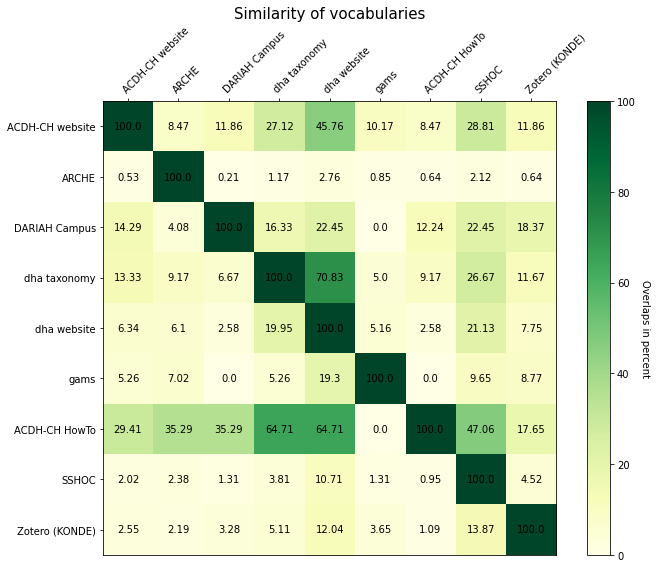

In [ ]:
vc.heatmap(vocabs)

Which keywords constitute the overlap between specific vocabularies? The function *show_overlaps()* takes a list of two or more vocabularies as its input (e.g. *[dc, ht]* for DARIAH Campus and ACDH-CH HowTo) and returns the keywords that occur in **all** of the specified vocabularies:

In [ ]:
vc.show_overlaps([dc, ht])

open access
tei
xml
lexicography
semantic web
skos


### String matching vs. fuzzy matching

So far: only string matching - next part: adding flexible fuzzy matching to this workflow - comparing the results

### Comparing subject vocabularies with non-subject vocabularies

As previously mentioned, the compared vocabularies define themselves as collections of "subjects", "topics" or "keywords". What exactly these concepts entail, may, however, be partially dependent on the vocabulary provider, the vocabulary user (esp. in case of open/uncontrolled vocabularies or 'fauxonomies') and the conceptual structure of the resource in which a vocabulary is used (e.g. multiple specific properties vs. one-property-takes-all-approach). To find out more about what is in the (potentially) 'mixed bags' of subject vocabularies, it  makes sense to not only compare them with each other, but also with other non-subject vocabularies, for instance vocabularies systematizing disciplines (e.g. ÖFOS), languages (e.g. ...) or methods/activities (e.g. TaDiRAH). To do so, the following non-subject vocabularies were also prepared and are provided for further exploration:

| Keyword | Name | Scope | Controlled | Language | Link |
|--------|---------------------|----------------|-----------|---------|------------------|
| öfos | ÖFOS | disciplines | yes | ger | .... |
| tadirah | TaDiRAH | activities | yes | ... | https://vocabs.dariah.eu/tadirah/en/ |
| iso3 | ISO-639-3 | languages | yes | en | https://vocabs.acdh.oeaw.ac.at/iso639_3 |
| iso1 | ISO-639-1 | languages | yes | en | https://vocabs.acdh.oeaw.ac.at/iso639-1/de/ |
| arche_hasCategory | ARCHE hasCategory | resource-types | yes | en | https://vocabs.acdh.oeaw.ac.at/arche_category/ |
| arche_hasAppliedMethod | ARCHE hasAppliedMethod | methods | no | en | .... |
| ... | ... | ... | ... | ... | .... |

In [ ]:
vocabs = [#(acdhch, "ACDH-CH website"), 
            (arche, "ARCHE"), 
            #(dc, "DARIAH Campus"), 
            #(dha_taxonomy, "dha taxonomy"), 
            (dha_website, "dha website"),
            #(gams, "gams"),
            #(ht, "ACDH-CH HowTo"),
            #(sshoc, "SSHOC"),
            #(zotero_konde, "Zotero (KONDE)"),
            (öfos, "ÖFOS"),
            ]

In [ ]:
### Add your code for comparing one or more subject vocabularies with various non-subject vocabularies here, using the functions provided so far